In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
from shapely.geometry import Point
import random
import numpy as np
import math

In [2]:
# survey = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1522_TE10//Edits//HI1522_TE10_MERGE.csv')

# geometry = [Point(xy) for xy in zip(survey.X, survey.Y)]
# crs = {'init': 'epsg:4326'}
# geosurvey = gpd.GeoDataFrame(survey, crs=crs, geometry=geometry)


In [3]:
# geosurvey.head()

In [4]:
# # Code for cutting up dataset:
# survey_C = geosurvey.loc[(survey['X']> 1.061) & (survey['Y']<51.737)]

In [5]:
# survey_C.plot(column='Depth', cmap='hsv')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

In [19]:
survey = "HI1521"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1521//Edits//'

array = np.load(path + 'array10m//arraymean.npy')
geosurveyp = pd.read_csv(path + 'HI1521_EPSG3035')

In [20]:
#find the corners of the projected dataset and the min/max depth for plotting

minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3761668.65736 3765964.97838 4296.32102323
3288792.94661 3297198.56579 8405.61917319


In [21]:
step = 10

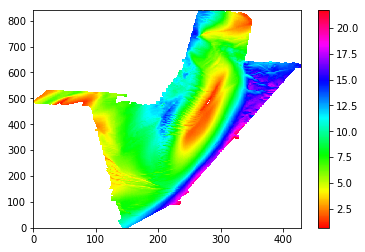

In [22]:
col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()#find the corners of the projected dataset and the min/max depth for plotting